In [7]:
import GPy
import numpy as np
import math
from matplotlib import pyplot as plt

# Consider a function and draw some data from it. Then try to fit a gaussian process using GPy toolkit.


### True function: $$f(x)=x^2$$
Add uniform random noise with unit variance and get 5 samples. We will fit a gaussian process to these samples.

The true function can be changed by changing the following two function definitions. 

In [8]:
def f(x):
    """define the main function here"""
    return x**2
vf = np.vectorize(f)

In [9]:
x = np.random.uniform(-3.,3.,(5,1))
y = vf(x) + np.random.randn(5,1)*0.2
x_true=np.linspace(-3,3,100)
y_true=vf(x_true)

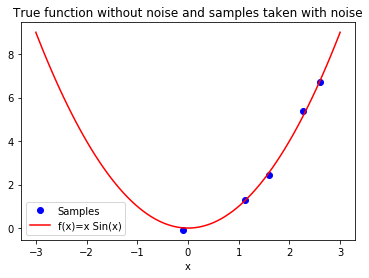

In [10]:
#plt.figure(figsize=(20,5))
%matplotlib inline
plt.plot(x,y,'bo',label='Samples')
plt.plot(x_true,y_true,'r',label=r'f(x)=x Sin(x)')
plt.legend()
#plt.ylim(-2,2)
plt.xlabel('x')
plt.title('True function without noise and samples taken with noise')
plt.show()

### Use GPy module to fit a gausian process to these samples

In [11]:
#m = GPy.models.GPRegression(0,0,kernel,noise_var=0.0001)
#m.kern
#x_predict=np.array([[i] for i in np.arange(-3,3,0.01)])
#y_predict,var_predict=m.predict(Xnew=x_predict)
#m.optimize_restarts(num_restarts = 10)

## First without training GP on data let's look at the prior function distribution. 

Assume that there is a uniform prior in the range (0.00001,2) for length parameter.  

In [12]:
#x_predict=np.array([[i] for i in np.arange(-3,3,0.01)])#dim=(1*number of prediction points)
#y_predict,var_predict=m.predict(Xnew=x_predict)  
#sigma_predict=np.sqrt(var_predict)

##### Change the legnthscale, variance and number of samples fro, prior by changing the distributions in Zip function. Number of samples drawn at each prior choice can also be changed using draws_per_prior variable. 

Text(0.5, 1.0, 'Gaussian process regression')

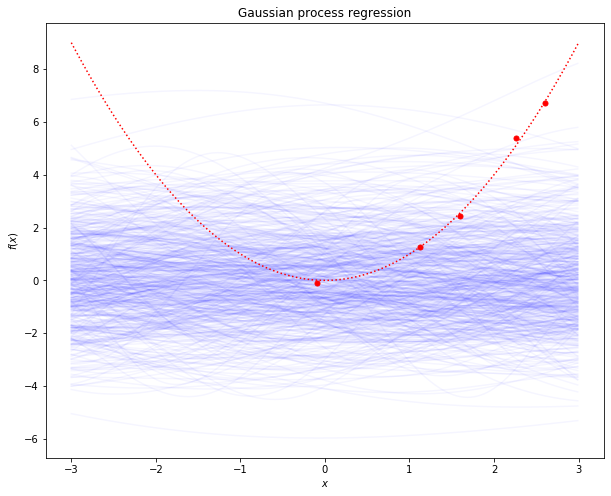

In [19]:
priors=zip(np.random.uniform(1,5,50),np.random.uniform(1,5,50))
draws_per_prior=10

x_predict=np.array([[i] for i in np.arange(-3,3,0.01)])
kernel = GPy.kern.RBF(input_dim=1, variance=5., lengthscale=1.)

x_predict=x_predict[:,]
mu = np.zeros((len(x_predict)))

# Plot the function, the prediction and the 95% confidence interval
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(x_true,y_true, 'r:', label=r'$f(x) = x^2$',zorder=10)
plt.plot(x,y, 'r.', markersize=10, label='samples with noise',zorder=5)
for l,var in priors:
    kernel['.*lengthscale']= l
    kernel['.*var']= var
    C = kernel.K(x_predict,x_predict)
   # m.kern
   # kernel = GPy.kern.RBF(input_dim=1, variance=var, lengthscale=l)
   # m = GPy.models.GPRegression(x,y,kernel)
   # print(m)
    #mu,C=m.predict_noiseless(Xnew=x_predict, full_cov= True)
    Z = np.random.multivariate_normal(mu,C,10)
   # print(Z.shape)
    for i in range(0,draws_per_prior):
        plt.plot(x_predict,Z[i,:], 'b-', label='Prediction from GP emulator', alpha=0.04,zorder=0)
#    plt.fill(np.concatenate([x_predict, x_predict[::-1]]),np.concatenate([y_predict - 1.9600 * sigma_predict,(y_predict + 1.9600 * sigma_predict)[::-1]]),
#         alpha=.5, fc='b', ec='None', label='95% confidence interval')
#plt.fill_between(x_predict.flatten(),y_predict.flatten() - 1.9600 * sigma_predict.flatten(),y_predict.flatten() + 1.9600 * sigma_predict.flatten(), alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gaussian process regression')
#plt.ylim(-0.5, 3)
#plt.legend(loc='lower left')

After optimization

Text(0.5, 1.0, 'Gaussian process regression')

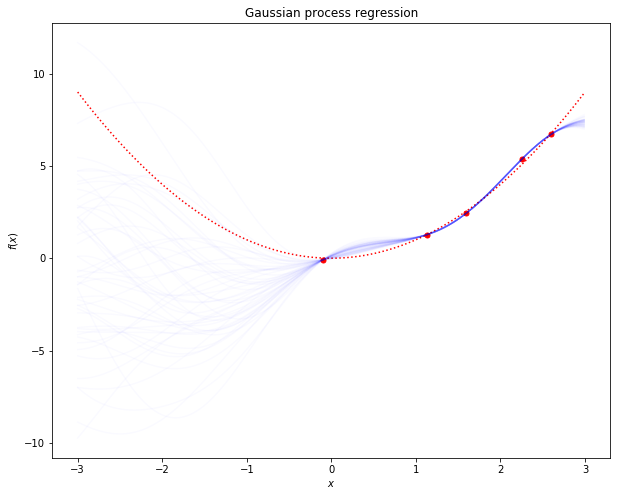

In [18]:
# Plot the function, the prediction and the 95% confidence interval
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(x_true,y_true, 'r:', label=r'$f(x) = x ^2$')
plt.plot(x,y, 'r.', markersize=10, label='samples with noise')
m = GPy.models.GPRegression(x,y,kernel,noise_var=0.0001)
m.optimize_restarts(num_restarts=10,verbose=False)
   # m.kern
   # kernel = GPy.kern.RBF(input_dim=1, variance=var, lengthscale=l)
   # m = GPy.models.GPRegression(x,y,kernel)
   # print(m)
mu,C=m.predict(Xnew=x_predict, full_cov= True)
Z = np.random.multivariate_normal(mu[:,0],C,50)
   # print(Z.shape)
for i in range(0,50):
    plt.plot(x_predict,Z[i,:], 'b-', label='Prediction from GP emulator', alpha=0.02)
#    plt.fill(np.concatenate([x_predict, x_predict[::-1]]),np.concatenate([y_predict - 1.9600 * sigma_predict,(y_predict + 1.9600 * sigma_predict)[::-1]]),
#         alpha=.5, fc='b', ec='None', label='95% confidence interval')
#plt.fill_between(x_predict.flatten(),y_predict.flatten() - 1.9600 * sigma_predict.flatten(),y_predict.flatten() + 1.9600 * sigma_predict.flatten(), alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gaussian process regression')
#plt.ylim(-0.5, 3)
#plt.legend(loc='lower left')